# Sound Road Classificator
## Algorythm to classification of sound using RNN
This algorythom is based in Tensorflow and Librosa

## System and Libraries

## Predict

### Import libraries 

In [3]:
import glob
import os
import librosa
import librosa.display
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.python.ops import rnn, rnn_cell
import numpy as np


In [4]:
%matplotlib inline
plt.style.use('ggplot')

### Training variables

For complete training on server we used 10000 iterations(training_iters)

In [5]:
# predict parameters
batch_size = 50
display_step = 200

# Network Parameters
n_input = 50 
n_steps = 50
n_hidden = 300
n_classes = 2 

# Shape tensors
x = tf.placeholder("float", [None, n_input, n_steps])
y = tf.placeholder("float", [None, n_classes])

weight = tf.Variable(tf.random_normal([n_hidden, n_classes]))
bias = tf.Variable(tf.random_normal([n_classes]))


In [6]:
#Defining RNN
def RNN(x, weight, bias):
    cell = rnn_cell.LSTMCell(n_hidden,state_is_tuple = True)
    cell = rnn_cell.MultiRNNCell([cell])
    output, state = tf.nn.dynamic_rnn(cell, x, dtype = tf.float32)
    output = tf.transpose(output, [1, 0, 2])
    last = tf.gather(output, int(output.get_shape()[0]) - 1)
    return tf.nn.softmax(tf.matmul(last, weight) + bias)

prediction = RNN(x, weight, bias)

tf.argmax(prediction, 1, name="predd")    

# Initializing the variables
init = tf.global_variables_initializer()

### Load data functions

In [7]:
#Get data Function
def windows(data, window_size):
    start = 0
    while start < len(data):
        yield start, start + window_size
        start += (window_size / 2)

def extract_features_test(input_test ,bands = n_input, frames = n_steps):
    window_size = 512 * (frames - 1)
    mfccs = []
    labels = []
    sound_clip,s = librosa.load(input_test)

    for (start,end) in windows(sound_clip,window_size):
        tmp_clip = sound_clip[int(start):int(end)]
        if len(tmp_clip) == window_size:
            signal = tmp_clip
            mfcc = librosa.feature.mfcc(y=signal, sr=s, n_mfcc = bands).T.flatten()[:, np.newaxis].T
            mfccs.append(mfcc)

    features = np.asarray(mfccs).reshape(len(mfccs),bands,frames)
    return np.array(features)

### Predict function Load model

In [8]:
# Predict Function
def predict(sample_path="trainset/cobblestone/cobblestone-1-.flac", model_path="./model/big/model_big.ckt.meta"):

	saver = tf.train.import_meta_graph(model_path)
	graph = tf.get_default_graph()
	ts_features = extract_features_test(sample_path)
	preddd = graph.get_tensor_by_name('predd:0')

	type0 = []
	type1 = []

	with tf.Session() as sess:
	    # Initialize variables
	    sess.run(init)
	    #saver.restore(sess, 'model/small/model_small.ckpt.data-00000-of-00001')
	    # Restore model weights from previously saved model
	    offset = 0
	    while offset<len(ts_features):
	    	batch_x = ts_features[offset:(offset + batch_size), :, :]
	    	feed_dict = {x: batch_x}
	    	classification = sess.run(preddd,feed_dict)
	    	tmp1 = 0.
	    	for ii in classification:
	    		if ii == 1:
	    			tmp1 = tmp1 + 1;
	    	tmptmp = float(tmp1)/len(classification)
	    	type0.append(1.-tmptmp)
	    	type1.append(tmptmp)
	    	offset= offset + batch_size
	return type0, type1

2-tracks mixed

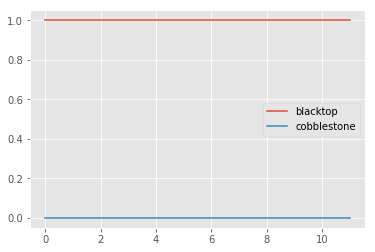

In [9]:
black, cobbl = predict('testset/mixed.wav')
fig = plt.figure()
plt.plot(black, label="blacktop")
plt.plot(cobbl,label="cobblestone")
plt.legend()
plt.show()

Cobblestone first and then blacktop

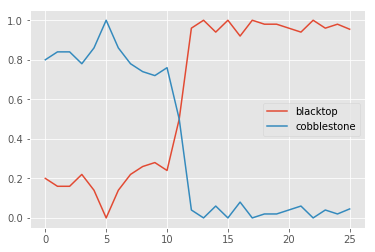

In [10]:
black, cobbl = predict('testset/cobble2blacktop.wav')
fig = plt.figure()
plt.plot(black, label="blacktop")
plt.plot(cobbl,label="cobblestone")
plt.legend()
plt.show()

First half 2 mixed and then blacktop

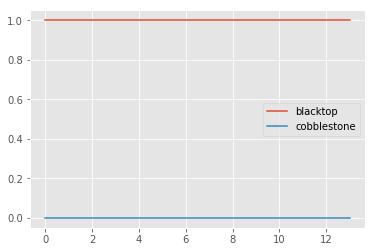

In [11]:
black, cobbl = predict('testset/cobble-black.wav')
fig = plt.figure()
plt.plot(black, label="blacktop")
plt.plot(cobbl,label="cobblestone")
plt.legend()
plt.show()

Cobblestone with blacktop inserted and mixed

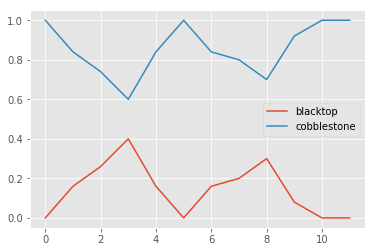

In [12]:
black, cobbl = predict('testset/cobble-withblack.wav')
fig = plt.figure()
plt.plot(black, label="blacktop")
plt.plot(cobbl,label="cobblestone")
plt.legend()
plt.show()

Cobblestone-blacktop-cobblestone-blacktope

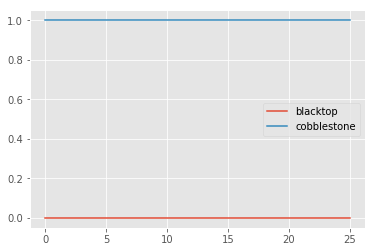

In [14]:
black, cobbl = predict('testset/cobb-black-cobb-black.wav')
fig = plt.figure()
plt.plot(black, label="blacktop")
plt.plot(cobbl,label="cobblestone")
plt.legend()
plt.show()

Blacktop with cobblestone inserted and mixed

In [ ]:
black, cobbl = predict('testset/blacktop-withcobble.wav')
fig = plt.figure()
plt.plot(black, label="blacktop")
plt.plot(cobbl,label="cobblestone")
plt.legend()
plt.show()

Blacktop to cobblestone with fadder

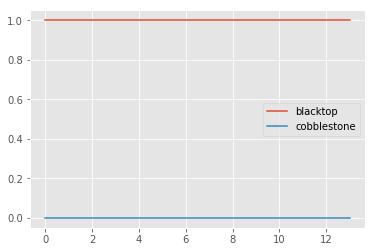

In [15]:
black, cobbl = predict('testset/black2cobbFadder.wav')
fig = plt.figure()
plt.plot(black, label="blacktop")
plt.plot(cobbl,label="cobblestone")
plt.legend()
plt.show()